In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values


In [3]:
#mean X and Y
mean_x=np.mean(X)
mean_y=np.mean(Y)
#total number of values
m=len(X)
#calculatin b1 and b0 or m and c
numer=0
denom=0
for i in range(m):
    numer+=(X[i]-mean_x)*(Y[i]-mean_y)
    denom+=(X[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1 * mean_x)
#print coefficients
print(b1, b0)

0.26342933948939945 325.57342104944223


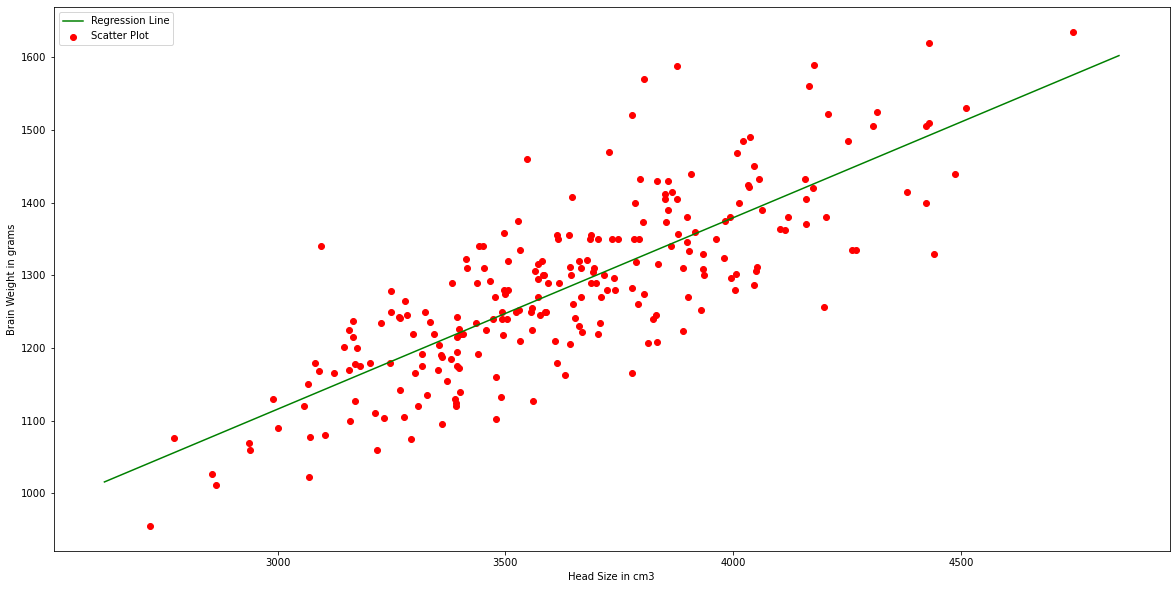

In [4]:
#plotting values and regression line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
#calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b0 + b1 * x
#plotting line
plt.plot(x,y, color='green', label='Regression Line')
#plotting scatter points
plt.scatter(X,Y, color='red', label='Scatter Plot')
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [5]:
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print(r2)

0.6393117199570003


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#cannot use rank 1 matrix in scikit learn
X = X.reshape(m, 1)
#creating model
reg = LinearRegression()
#fitting training data
reg = reg.fit(X, Y)
#Y prediction
Y_pred = reg.predict(X)

#calculating R2 score
r2_score = reg.score(X, Y)
print(r2_score)

0.639311719957
